contour → 404 in 0.01s
edge_enhance → 404 in 0.35s
detail → 404 in 0.39s
emboss → 404 in 0.43s
blur → 404 in 0.47s


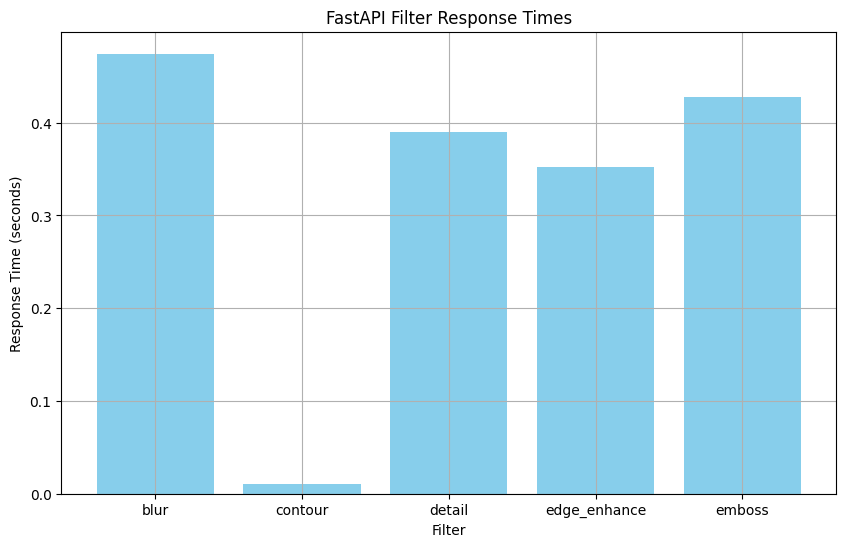

In [2]:
import aiohttp
import asyncio
import time
import matplotlib.pyplot as plt

URL = "http://127.0.0.1:8000"
IMAGE_PATH = r"D:\rrcc\web development3\web-apis-with-python\p4-image-filter-flask\sample.jpg"
filters = ["blur", "contour", "detail", "edge_enhance", "emboss"]

async def send_request(session, filter_name):
    start = time.time()
    with open(IMAGE_PATH, "rb") as img_file:
        form = aiohttp.FormData()
        form.add_field("image", img_file, filename="sample.jpg", content_type="image/jpeg")
        async with session.post(f"{URL}/{filter_name}", data=form) as resp:
            content = await resp.read()
            duration = time.time() - start
            with open(f"{filter_name}.jpg", "wb") as f:
                f.write(content)
            print(f"{filter_name} → {resp.status} in {duration:.2f}s")
            return filter_name, duration

async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [send_request(session, f) for f in filters]
        results = await asyncio.gather(*tasks)
    return results

# Run the async tasks
response_data = await main()

# Plot response times
filter_names = [item[0] for item in response_data]
durations = [item[1] for item in response_data]

plt.figure(figsize=(10, 6))
plt.bar(filter_names, durations, color="skyblue")
plt.xlabel("Filter")
plt.ylabel("Response Time (seconds)")
plt.title("FastAPI Filter Response Times")
plt.grid(True)